In [2]:
import csv
import pandas as pd
import numpy as np

In [3]:
escitalopram_id = "CID100002771" #"CID100002771"
atc1 = "N06AB04"
atc2 = "N06AB10"

In [4]:
dataset_path = "/home/samuel/NYU/BDS/project/meddra/"

def read_tsv_file(file_path, headers = True):
    try:
        data = []
        with open(file_path, 'r', newline='', encoding='utf-8') as file:
            # Using the CSV reader with the tab delimiter
            reader = csv.reader(file, delimiter='\t')

            if headers == True:
                # Reading headers
                headers = next(reader)
                print("Headers:", headers)

            # Reading data rows
            for row in reader:
                data.append(row)

        # Create a Pandas DataFrame using the headers and data
        if headers == True:
            df = pd.DataFrame(data, columns=headers)
        else:
            df = pd.DataFrame(data) #, columns=headers)
        return df

    except FileNotFoundError:
        print(f"Error: File not found at '{file_path}'")
    except Exception as e:
        print(f"An error occurred: {e}")
meddra_file_path = dataset_path + 'meddra_all_se.tsv'
meddra_df = read_tsv_file(meddra_file_path)
escitalopram_sides_table = meddra_df[meddra_df[0] == escitalopram_id]
escitalopram_sides = escitalopram_sides_table[5].unique()

Headers: ['CID100000085', 'CID000010917', 'C0000729', 'LLT', 'C0000729', 'Abdominal cramps']


In [5]:
meddra_df[meddra_df[0] == escitalopram_id]

,0,1,2,3,4,5
42395,CID100002771,CID000002771,C0000737,LLT,C0000737,Abdominal pain
42396,CID100002771,CID000002771,C0000737,PT,C0687713,Gastrointestinal pain
42397,CID100002771,CID000002771,C0000737,PT,C0000737,Abdominal pain
42398,CID100002771,CID000002771,C0000786,LLT,C0000786,Abortion spontaneous
42399,CID100002771,CID000002771,C0000786,PT,C0000786,Abortion spontaneous
...,...,...,...,...,...,...
44575,CID100002771,CID000146570,C2981158,PT,C2981158,Loss of libido
44576,CID100002771,CID000146570,C3665347,LLT,C3665347,Visual impairment
44577,CID100002771,CID000146570,C3665347,PT,C3665347,Visual impairment
44578,CID100002771,CID000146570,C3665386,LLT,C3665386,Abnormal vision


In [6]:
processed_dataset = pd.read_csv("../review_dataset/drugsComTrain_processed.csv")
escitalopram_dataset = processed_dataset[processed_dataset["drugName"] == "Escitalopram"]
escitalopram_dataset

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,processed_review
203,140891,Escitalopram,Generalized Anxiety Disorde,"""The time I been on lexapro I had mild side ef...",7.0,"April 27, 2016",13,"""the time lexapro mild side effect like yawn i..."
237,214628,Escitalopram,Generalized Anxiety Disorde,"""This drug is pretty great for depression, how...",5.0,"August 14, 2017",7,"""thi drug pretti great depression, howev serio..."
252,141047,Escitalopram,Anxiety,"""Day 2. Taking for major anxiety/ slight depre...",10.0,"October 6, 2015",11,"""day 2. take major anxiety/ slight depression...."
314,142104,Escitalopram,Depression,"""I&#039;ve been on lexapro for several years. ...",8.0,"March 9, 2009",376,"""i'v lexapro sever years. say initi side effec..."
405,141645,Escitalopram,Depression,"""I am a 35 year-old female. I&#039;ve always b...",10.0,"November 3, 2012",81,"""i 35 year-old female. i'v alway melanchol per..."
...,...,...,...,...,...,...,...,...
160596,141107,Escitalopram,Depression,"""It works really good. I also have anxiety and...",9.0,"August 10, 2015",65,"""it work realli good. also anxieti part helps...."
160625,141426,Escitalopram,Anxiety,"""I feel compelled to share my experience becau...",9.0,"January 27, 2014",41,"""i feel compel share experi know other like me..."
160687,140846,Escitalopram,Depression,"""I have taken Lexapro for 10 years. I had seve...",9.0,"April 20, 2016",32,"""i taken lexapro 10 years. sever depression/an..."
160716,141419,Escitalopram,Depression,"""Sexually frustrated me and I was a little bit...",6.0,"February 9, 2014",36,"""sexual frustrat littl bit aggress come onto i..."


In [7]:
escitalopram_sides_counted = pd.DataFrame(escitalopram_sides, columns=["side_effect_name"]).copy()
escitalopram_sides_counted["count"] = 0
for review in escitalopram_dataset["review"]:
    for side_effect_name in escitalopram_sides_counted["side_effect_name"]:
        if side_effect_name.lower() in review.lower():
            escitalopram_sides_counted.loc[escitalopram_sides_counted["side_effect_name"] == side_effect_name, "count"] += 1
escitalopram_sides_counted.sort_values(by = "count", ascending=False)

,side_effect_name,count
17,Anxiety,785
355,Depression,439
607,Panic attack,213
183,Nausea,122
120,Headache,112
...,...,...
313,Phosphatase alkaline increased,0
314,Blood alkaline phosphatase increased,0
315,Prothrombin level increased,0
316,Electrocardiogram QT prolonged,0


In [8]:
relevant_side_effect = list(escitalopram_sides_counted[escitalopram_sides_counted["count"] > 5]["side_effect_name"])
for relevant_effect in relevant_side_effect:
    escitalopram_dataset.loc[:, relevant_effect] = False
    for index,  review in escitalopram_dataset["review"].items():
        if relevant_effect.lower() in review.lower():
            escitalopram_dataset.loc[index, relevant_effect] = True
escitalopram_dataset

/tmp/ipykernel_974/204483602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:, relevant_effect] = False
/tmp/ipykernel_974/204483602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escitalopram_dataset.loc[:, relevant_effect] = False
/tmp/ipykernel_974/204483602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,processed_review,Anxiety,Chest pain,...,Anger,Fibromyalgia,Hunger,Irritability,Lethargy,Night sweats,Panic attack,Upset stomach,Crying,Anxiety attack
203,140891,Escitalopram,Generalized Anxiety Disorde,"""The time I been on lexapro I had mild side ef...",7.0,"April 27, 2016",13,"""the time lexapro mild side effect like yawn i...",False,False,...,False,False,False,False,False,False,False,False,False,False
237,214628,Escitalopram,Generalized Anxiety Disorde,"""This drug is pretty great for depression, how...",5.0,"August 14, 2017",7,"""thi drug pretti great depression, howev serio...",True,False,...,False,False,True,False,False,False,False,False,False,False
252,141047,Escitalopram,Anxiety,"""Day 2. Taking for major anxiety/ slight depre...",10.0,"October 6, 2015",11,"""day 2. take major anxiety/ slight depression....",True,False,...,False,False,False,False,False,False,False,False,False,False
314,142104,Escitalopram,Depression,"""I&#039;ve been on lexapro for several years. ...",8.0,"March 9, 2009",376,"""i'v lexapro sever years. say initi side effec...",False,False,...,False,False,False,False,False,False,False,False,False,False
405,141645,Escitalopram,Depression,"""I am a 35 year-old female. I&#039;ve always b...",10.0,"November 3, 2012",81,"""i 35 year-old female. i'v alway melanchol per...",True,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160596,141107,Escitalopram,Depression,"""It works really good. I also have anxiety and...",9.0,"August 10, 2015",65,"""it work realli good. also anxieti part helps....",True,False,...,False,False,False,False,False,False,False,False,False,False
160625,141426,Escitalopram,Anxiety,"""I feel compelled to share my experience becau...",9.0,"January 27, 2014",41,"""i feel compel share experi know other like me...",True,False,...,False,False,False,False,False,False,False,False,False,False
160687,140846,Escitalopram,Depression,"""I have taken Lexapro for 10 years. I had seve...",9.0,"April 20, 2016",32,"""i taken lexapro 10 years. sever depression/an...",True,False,...,False,False,False,False,False,False,False,False,False,False
160716,141419,Escitalopram,Depression,"""Sexually frustrated me and I was a little bit...",6.0,"February 9, 2014",36,"""sexual frustrat littl bit aggress come onto i...",False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
reg_df = escitalopram_dataset.drop(columns=["Unnamed: 0", "drugName", "condition", "review", "date", "usefulCount", "processed_review"])
#reg_df = reg_df[(reg_df.drop(columns=["rating"]) == True).any(axis = 1)]


In [24]:
reg_df

,rating,Anxiety,Chest pain,Constipation,Dizziness,Rash,Fatigue,Headache,Major depression,Nausea,...,Anger,Fibromyalgia,Hunger,Irritability,Lethargy,Night sweats,Panic attack,Upset stomach,Crying,Anxiety attack
203,7.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
237,5.0,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
252,10.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
314,8.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
405,10.0,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160596,9.0,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
160625,9.0,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
160687,9.0,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
160716,6.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = reg_df.drop(columns=['rating'])  # Assuming 'review' is the target column
y = reg_df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict the review ratings for the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 7.303627346934664


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [27]:
# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA to the boolean data
pca.fit(X)

PCA()

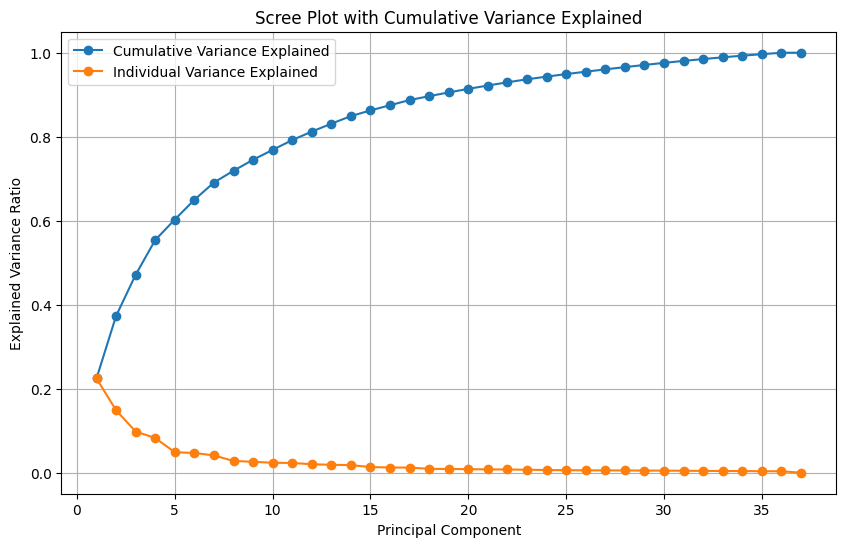

In [28]:
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', label='Cumulative Variance Explained')
plt.plot(np.arange(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', label='Individual Variance Explained')
plt.title('Scree Plot with Cumulative Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from sklearn.cluster import KMeans

# Assuming reg_df contains your data
# It's generally recommended to scale your data before applying k-means
# This step is especially important if your features are on different scales
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (k)
k = 2  # You can adjust this number based on your requirements

# Initialize the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# You can assign these cluster labels back to your DataFrame if needed
reg_df['cluster'] = cluster_labels

# You can also access the cluster centers
cluster_centers = kmeans.cluster_centers_

# Evaluate the clustering (optional)
# For example, you can check inertia which is the sum of squared distances of samples to their closest cluster center
inertia = kmeans.inertia_
print("Inertia:", inertia)

/home/samuel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia: 45967.64443260235


In [30]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.4220576080509359


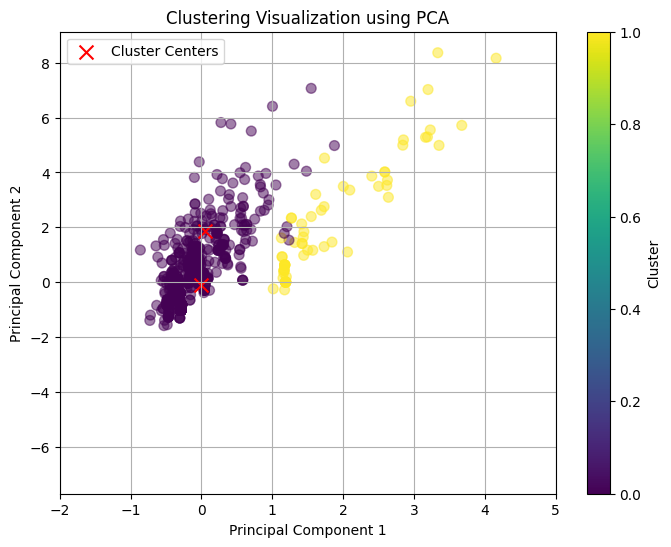

In [33]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5, marker = "o")
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Clustering Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.colorbar(label='Cluster')
plt.xlim([-2, 5])
plt.show()